In [ ]:
# import essential libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# create training and testing datas
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# normalize pixel values to be between 0 and 1
train_data, test_data = train_data/255. , test_data/255.

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

In [ ]:
# set random seed
tf.random.set_seed(42)

# create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/10))

# create a model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data,
                    tf.one_hot(train_labels, depth=10),
                    epochs=30,
                    validation_data = (test_data, tf.one_hot(test_labels, depth=10)),
                    callbacks = [lr_scheduler])

Epoch 1/30
1875/1875 [==============================] - 13s 4ms/step - loss: 1.8440 - accuracy: 0.3359 - val_loss: 1.6300 - val_accuracy: 0.3799 - lr: 1.0000e-04
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3770 - accuracy: 0.5329 - val_loss: 1.1958 - val_accuracy: 0.6221 - lr: 1.2589e-04
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0650 - accuracy: 0.6544 - val_loss: 0.9945 - val_accuracy: 0.6746 - lr: 1.5849e-04
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9138 - accuracy: 0.7003 - val_loss: 0.8774 - val_accuracy: 0.7180 - lr: 1.9953e-04
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8132 - accuracy: 0.7399 - val_loss: 0.7929 - val_accuracy: 0.7394 - lr: 2.5119e-04
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7300 - accuracy: 0.7651 - val_loss: 0.7304 - val_accuracy: 0.7571 - lr: 3.1623e-04
Epoch 7/30
1875/1875 [===========

In [ ]:
def show_ideal_lr(epoch, lrhistory):
  lrs = 1e-3 * 10 ** (tf.range(epoch)/20)
  plt.semilogx(lrs, lrhistory.history['val_loss'])
  plt.xlabel('Learning Rate')
  plt.ylabel('Loss')
  plt.title("Finding the ideal learning rate")

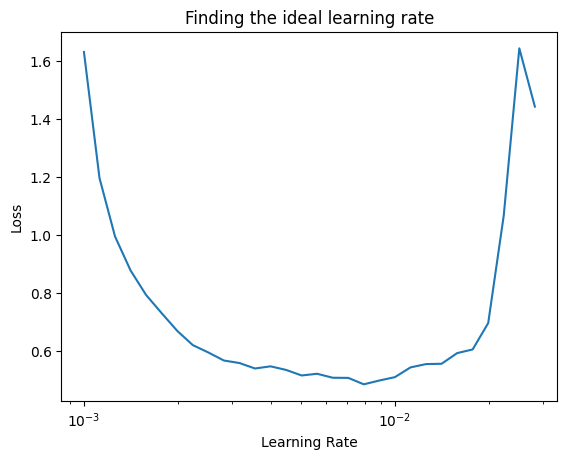

In [ ]:
show_ideal_lr(30, history)

In [ ]:
# This shows us ideal learning_rate is aproximately 0.001


In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# fit the model
history_lr = model.fit(train_data,
                    tf.one_hot(train_labels, depth=10),
                    epochs=20,
                    validation_data = (test_data, tf.one_hot(test_labels, depth=10))
                    )

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5334 - accuracy: 0.8130 - val_loss: 0.4360 - val_accuracy: 0.8436
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3782 - accuracy: 0.8619 - val_loss: 0.4645 - val_accuracy: 0.8416
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3404 - accuracy: 0.8745 - val_loss: 0.3849 - val_accuracy: 0.8597
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3163 - accuracy: 0.8833 - val_loss: 0.3968 - val_accuracy: 0.8571
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3006 - accuracy: 0.8885 - val_loss: 0.3775 - val_accuracy: 0.8652
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2860 - accuracy: 0.8929 - val_loss: 0.3957 - val_accuracy: 0.8526
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2759 - accuracy: 0.8968 - val_loss: 0.3832 - val_accuracy

<Axes: >

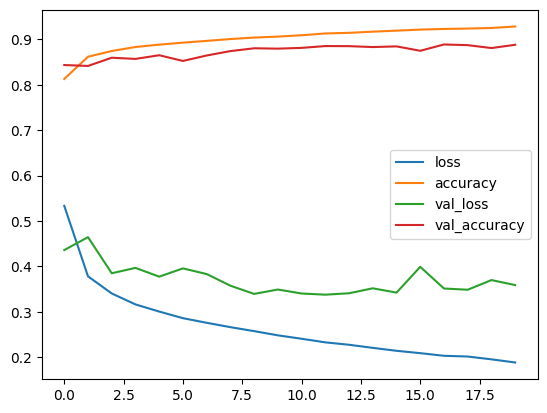

In [ ]:
pd.DataFrame(history_lr.history).plot()

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix (y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
        cm = confusion_matrix(y_true, y_pred)
        cm_norm = cm.astype('float') / (cm.sum (axis = 1) [:, np.newaxis])  # Normalize our confusion
        n_classes = cm.shape[0]

        # Prettify it
        fig , ax = plt.subplots ( figsize = figsize )

        # create a matrix plot
        cax = ax.matshow (cm, cmap=plt.cm.Blues)
        fig.colorbar(cax)

        # Set labels to be classes
        if classes :
          labels = classes
        else:
          labels = np.arange(cm.shape[0])

        # Label the axes
        ax.set(title="Confusion Matrix",
               xlabel = "Predicted Labels",
               ylabel = "True Labels",
               xticks = np.arange(n_classes),
               yticks = np.arange(n_classes),
               xticklabels = labels,
               yticklabels = labels)

        # Set x-axis labels to bottom
        ax.xaxis.set_label_position("bottom")
        ax.xaxis.tick_bottom()

        # Adjust label size
        ax.yaxis.label.set_size(text_size),
        ax.xaxis.label.set_size(text_size),
        ax.title.set_size(text_size)

        # Set threshold for different colors
        threshold = (cm.max() + cm.min()) / 2.

        # plot the text on each cell
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(
               j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
               horizontalalignment="center",
               color="white" if cm[i, j] > threshold else "black",
               size=text_size
               )


In [ ]:
# Make some predictions
y_probs = model.predict(test_data)

# Convert all of the predictions probabilities into integers
y_preds = tf.argmax(y_probs, axis=1)

# View the first 10 prediction labels
y_preds[:10]

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])>

In [ ]:
# Lets create the confusion matrix
confusion_matrix(test_labels, y_preds)

array([[854,   2,   9,  28,   8,   0,  93,   0,   6,   0],
       [  1, 968,   2,  22,   5,   0,   0,   1,   1,   0],
       [ 16,   0, 805,  13, 104,   0,  61,   0,   1,   0],
       [ 17,   3,  10, 888,  54,   0,  23,   0,   5,   0],
       [  1,   0,  76,  17, 875,   0,  29,   0,   2,   0],
       [  0,   0,   0,   1,   0, 947,   0,  27,   1,  24],
       [120,   1,  84,  27, 104,   0, 654,   0,  10,   0],
       [  0,   0,   0,   0,   0,   9,   0, 968,   0,  23],
       [  6,   0,   3,   3,   7,   2,   8,   4, 967,   0],
       [  0,   0,   0,   1,   0,   6,   1,  36,   0, 956]])

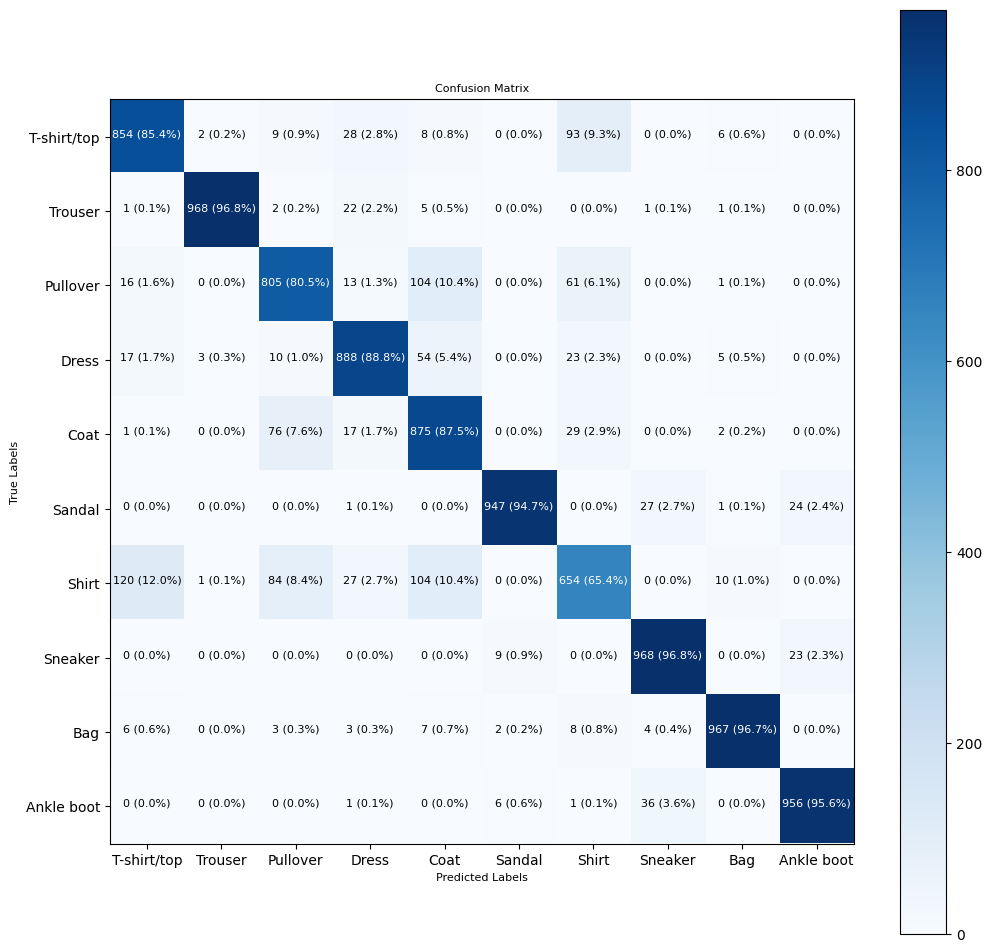

In [ ]:
# Make a prettier cf
make_confusion_matrix(  y_true = test_labels,
                        y_pred = y_preds,
                        classes = class_names,
                        figsize = (12, 12),
                        text_size = 8 )